  ## 1. 데이터 전처리

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 
import koreanize_matplotlib # 한글설정 라이브러리 
import plotly.express as px

%matplotlib inline 

In [2]:
train = pd.read_csv('cell2celltrain.csv')
test = pd.read_csv('cell2cellholdout.csv')
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

#### 결측치 처리 

In [4]:
data1 = train.copy()
data1.isnull().sum().sort_values(ascending=False)

AgeHH2                       909
AgeHH1                       909
PercChangeMinutes            367
PercChangeRevenues           367
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
ServiceArea                   24
CurrentEquipmentDays           1
Handsets                       1
HandsetModels                  1
OwnsComputer                   0
NonUSTravel                    0
BuysViaMailOrder               0
OptOutMailings                 0
RespondsToMailOffers           0
RetentionCalls                 0
HasCreditCard                  0
IncomeGroup                    0
RetentionOffersAccepted        0
NewCellphoneUser               0
NotNewCellphoneUser            0
ReferralsMadeBySubscriber      0
RVOwner                        0
OwnsMotorcycle                 0
AdjustmentsToCreditRating      0
HandsetPrice                   0
MadeCallTo

In [5]:
data1.dropna(inplace=True)
data1.isnull().sum().sort_values(ascending=False)

CustomerID                   0
HasCreditCard                0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
RetentionCalls               0
Churn                        0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH1                       0
CurrentEquipmentDays         0
HandsetModels                0
Handsets                     0
MonthlyR

#### 라벨인코딩 
범주형 컬럼 중 CreditRating 제외 모든 컬럼 드랍 후 라벨인코딩

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# 신용등급, 타겟 변수 제외 제거 
object_cols = data1.select_dtypes(include=['object']).columns
drop_cols = list(set(object_cols) - set(['CreditRating', 'Churn']))
data1.drop(columns=drop_cols, inplace=True, axis=1)
data1.drop(columns='CustomerID', inplace=True, axis=1) #CustomerID 도 제거 

data1.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'CreditRating'],
      dtype='object')

In [8]:
le = LabelEncoder()
object_cols = data1.select_dtypes(include=['object']).columns
data1[object_cols] = data1[object_cols].apply(le.fit_transform)
data1.reset_index(drop=True, inplace=True)
data1[object_cols]


,Churn,CreditRating
0,1,0
1,1,3
2,0,2
3,0,3
4,1,0
...,...,...
49747,0,1
49748,0,2
49749,0,0
49750,1,4


 Case3 전 데이터 전처리 저장 

In [9]:
data1.to_csv('data1.csv', index=False)

### case3 이후 데이터 전처리 


In [10]:
data2 = train.copy()
data2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


#### 결측치 제거

In [11]:
data2.dropna(inplace=True)
data2.isnull().sum().sort_values(ascending=False)

CustomerID                   0
HasCreditCard                0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
TruckOwner                   0
RVOwner                      0
Homeownership                0
BuysViaMailOrder             0
RespondsToMailOffers         0
OptOutMailings               0
NonUSTravel                  0
OwnsComputer                 0
RetentionCalls               0
Churn                        0
RetentionOffersAccepted      0
NewCellphoneUser             0
NotNewCellphoneUser          0
ReferralsMadeBySubscriber    0
IncomeGroup                  0
OwnsMotorcycle               0
AdjustmentsToCreditRating    0
HandsetPrice                 0
MadeCallToRetentionTeam      0
CreditRating                 0
PrizmCode                    0
Occupation                   0
AgeHH1                       0
CurrentEquipmentDays         0
HandsetModels                0
Handsets                     0
MonthlyR

#### Homeownership, Handsetprice, MaritalStatus, ServiceArea, CustomerID 컬럼 제거 
- Unknown 값이 50% 이상인 컬럼과  ServiceArea 제거

In [12]:
drop_cols = ['MaritalStatus', 'HandsetPrice', 'Homeownership', 'ServiceArea' , 'CustomerID']
data2.drop(drop_cols, inplace=True, axis=1)

#### AgeHH1, AgeHH2의 0값은 소득 그룹과, 신용등급이 동일한 그룹의 중간값으로 대치해준다

In [13]:
cond1 = (data2[['AgeHH1']]!=0).values
cond2 = (data2[['AgeHH2']]!=0).values
data_not_zero =  data2[cond1&cond2]
grouped_median = data_not_zero.groupby(['IncomeGroup', 'CreditRating'])[['AgeHH1', 'AgeHH2']].agg('median')
grouped_median

AgeHH1  AgeHH2
IncomeGroup CreditRating                
0           1-Highest       43.0    44.0
            2-High          40.0    38.0
            3-Good          40.0    43.0
            4-Medium        44.0    40.0
            5-Low           40.0    34.0
...                          ...     ...
9           3-Good          50.0    48.0
            4-Medium        50.0    48.0
            5-Low           48.0    46.0
            6-VeryLow       47.0    45.0
            7-Lowest        48.0    46.0

[70 rows x 2 columns]

In [14]:
for index, row in data2.iterrows():
    if row['AgeHH1'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH1']
        data2.at[index, 'AgeHH1'] = median_value
    
    if row['AgeHH2'] == 0:
        median_value = grouped_median.loc[(row['IncomeGroup'], row['CreditRating']), 'AgeHH2']
        data2.at[index, 'AgeHH2'] = median_value


In [15]:
def draw_px_histogram(df, x):
    fig = px.histogram(df, x=x)
    fig.update_layout(
    width=1500,  
    height=500, 
    )
    fig.show()

In [16]:
draw_px_histogram(data2, 'AgeHH1')

#### 라벨인코딩

In [17]:
le = LabelEncoder()
object_cols = data2.select_dtypes(include=['object']).columns
data2[object_cols] = data2[object_cols].apply(le.fit_transform)
data2.reset_index(drop=True, inplace=True)
data2[object_cols]

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,2,4
1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,3,2,4
2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,3,1
3,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,3,0,3
4,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,4
49748,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,2,0,3
49749,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,4
49750,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0,4


#### 이상치 제거 

In [18]:
data2.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
count,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,...,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000
mean,0.286320,58.717374,525.021466,46.834961,0.891841,39.754040,1.226327,-11.656175,-1.175937,6.010556,...,0.193178,0.138185,0.051475,4.402677,0.013547,0.053686,0.032582,1.864528,1.145059,3.163792
std,0.452045,44.317244,528.510155,23.759492,2.224725,96.091606,9.848360,255.858193,39.392124,9.036653,...,0.394796,0.345098,0.266490,3.110498,0.115602,0.382677,0.177541,1.568627,1.175946,0.886815
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.700000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,0.000000,48.380000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
75%,1.000000,70.910000,722.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,1.000000,1.000000,16.000000,9.000000,1.000000,25.000000,1.000000,6.000000,3.000000,7.000000


In [19]:
from sklearn.ensemble import IsolationForest
import collections

# n_estimators : 노드 수 (50 - 100사이의 숫자면 적당하다.)
# max_samples : 샘플링 수
# contamination : 이상치 비율
# max_features : 사용하고자 하는 독립변수 수 (1이면 전부 사용)
# random_state : seed를 일정하게 유지시켜줌(if None, the random number generator is the RandomState instance used by np.random)
# n_jobs : CPU 병렬처리 유뮤(1이면 안하는 것으로 디버깅에 유리. -1을 넣으면 multilple CPU를 사용하게 되어 메모리 사용량이 급격히 늘어날 수 있다.)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

# fit 함수를 이용하여, 데이터셋을 학습시킨다.
clf_ss.fit(data2)

# predict 함수를 이용하여, outlier를 판별해 준다. 0과 1로 이루어진 Series형태의 데이터가 나온다.
y_pred_outliers = clf_ss.predict(data2)

# 이상치의 개수를 Count하는 과정
collections.Counter(y_pred_outliers)

# 원래의 DataFrame에 붙히기. out행의 값이 -1인 것을 제거하면 이상치가 제거된 DataFrame을 얻을 수 있다.
data2['out']=y_pred_outliers
outliers=data2.loc[data2['out']== -1]
outlier_index=list(outliers.index)

c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



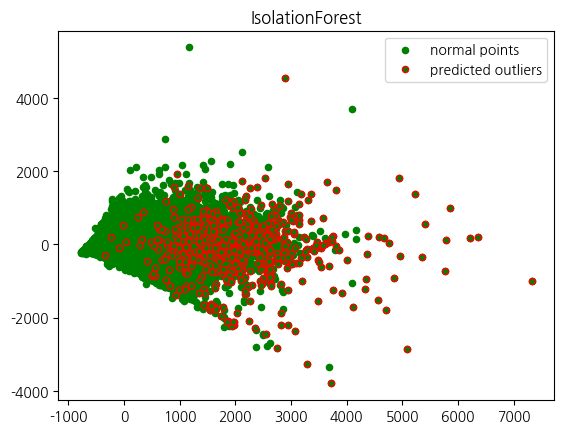

In [20]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(data2)
res=pd.DataFrame(pca.transform(data2))
Z = np.array(res)
plt.title("IsolationForest")
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [21]:
train_rm_out = data2[data2['out'] != -1]
train_rm_out['Churn'] = data2["Churn"]
train_rm_out.describe()

C:\Users\YUN\AppData\Local\Temp\ipykernel_23724\813980142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.0
mean,0.286637,57.222405,505.396678,46.297011,0.833570,36.612742,1.147464,-10.144597,-1.044742,5.741562,...,0.137268,0.050818,4.409307,0.013522,0.051021,0.031226,1.856621,1.146871,3.164210,1.0
std,0.452195,40.171865,483.745442,22.752487,1.843484,81.316424,8.956805,241.903488,37.219725,8.307003,...,0.344134,0.264041,3.109688,0.115495,0.373279,0.173929,1.563831,1.176050,0.888591,0.0
min,0.000000,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3406.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,33.500000,157.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.800000,0.700000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.0
50%,0.000000,47.895000,362.000000,45.000000,0.250000,2.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.0
75%,1.000000,69.857500,704.000000,60.000000,0.740000,39.000000,0.200000,64.000000,1.575000,7.300000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,1.0
max,1.000000,1223.380000,4719.000000,400.000000,45.050000,2560.000000,1112.400000,5192.000000,2483.500000,208.700000,...,1.000000,16.000000,9.000000,1.000000,25.000000,1.000000,6.000000,3.000000,7.000000,1.0


#### RobustScaler

In [22]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def scale_data_with_robust_scaler(data):
    rs = RobustScaler()
    scaled_data = pd.DataFrame(rs.fit_transform(data), columns=data.columns)
    return scaled_data

In [23]:
train_rs = scale_data_with_robust_scaler(train_rm_out)
train_rs.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,out
0,1.0,-0.657223,-0.261426,-0.766667,0.000000,-0.051282,0.0,-1.041096,-2.232836,-0.348485,...,0.0,0.0,-0.166667,0.0,0.0,1.0,-0.5,0.5,1.0,0.0
1,1.0,-0.850031,-0.643510,-0.933333,-0.337838,-0.051282,0.0,0.006849,0.035821,-0.409091,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.5,1.0,0.0
2,0.0,-0.272158,-0.647166,-0.233333,-0.337838,-0.051282,0.0,0.020548,0.035821,-0.454545,...,0.0,0.0,0.166667,0.0,0.0,0.0,0.5,1.0,-2.0,0.0
3,0.0,0.945747,1.736746,1.000000,1.337838,-0.051282,0.0,1.109589,1.002985,7.424242,...,0.0,0.0,0.166667,0.0,0.0,0.0,1.0,-0.5,0.0,0.0
4,1.0,-0.845905,-0.661792,-0.933333,-0.337838,-0.051282,0.0,0.034247,0.011940,-0.454545,...,1.0,0.0,0.666667,0.0,1.0,0.0,-0.5,-0.5,1.0,0.0


#### 오버샘플링

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
# Separate features (X) and target variable (y)
X = train_rs.drop('Churn', axis=1)
y = train_rs['Churn']

# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=70)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced data
train_ss_ov = pd.concat([X_resampled, y_resampled], axis=1)

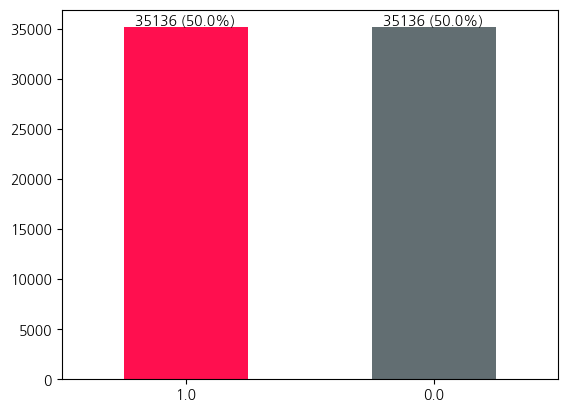

In [26]:
import matplotlib.pyplot as plt
value_counts = train_ss_ov['Churn'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar', color=['#ff0f4f','#626e72'])
# 각 값의 카운트를 막대 위에 표시
def autolabel_percent(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height} ({height / value_counts.sum() * 100:.1f}%)',
                ha='center', va='bottom')

autolabel_percent(ax.patches)

plt.xticks(rotation=360)
# 그래프 출력
plt.show()